In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
# install.packages("genius")
remotes::install_github("josiahparry/genius")
install.packages("textdata")
install.packages("tm")
install.packages("wordcloud")
install.packages("syuzhet")
install.packages("circlize")
install.packages("tidytext")
install.packages("reshape2")

R[write to console]: Downloading GitHub repo josiahparry/genius@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                            
2: CRAN packages only             
3: None                           
4: stringi (1.5.3 -> 1.6.2) [CRAN]
5: fansi   (0.4.2 -> 0.5.0) [CRAN]
6: pillar  (1.6.0 -> 1.6.1) [CRAN]
7: tibble  (3.1.1 -> 3.1.2) [CRAN]
8: openssl (1.4.3 -> 1.4.4) [CRAN]
9: dplyr   (1.0.5 -> 1.0.6) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 


R[write to console]: Installing 7 packages: SnowballC, plyr, janeaustenr, tokenizers, hunspell, reshape2, tidytext

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/SnowballC_0.7.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 405463 bytes (395 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

✔  checking for file ‘/tmp/RtmpUoDMgy/remotes3c6463ad46/JosiahParry-genius-18d0d87/DESCRIPTION’
─  preparing ‘genius’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘genius_2.2.3.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/textdata_0.4.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 4630908 bytes (4.4 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [3]:
%%R

library(genius)
library(magrittr)
library(purrr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(tm)
library(wordcloud)
library(syuzhet)
library(circlize)
library(tidytext)
library(reshape2)

R[write to console]: 
Attaching package: ‘purrr’


R[write to console]: The following object is masked from ‘package:magrittr’:

    set_names


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘tidyr’


R[write to console]: The following object is masked from ‘package:magrittr’:

    extract


R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate


R[write to console]: Loading required package: RColorBrewer

R[write to console]: ========================================
circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Doc

In [4]:
%%R
albums <-  tibble(
  artist = c(
    rep("Kendrick Lamar", 4)
  ),
  album = c(
    "DAMN", "To Pimp a Butterfly","good kid, m.A.A.d city","Section.80"
  )
)

albums

# A tibble: 4 x 2
  artist         album                 
  <chr>          <chr>                 
1 Kendrick Lamar DAMN                  
2 Kendrick Lamar To Pimp a Butterfly   
3 Kendrick Lamar good kid, m.A.A.d city
4 Kendrick Lamar Section.80            


In [5]:
%%R
album_lyrics <- albums %>% 
  mutate(tracks = map2(artist, album, genius_album))

album_lyrics

Joining, by = c("album_name", "track_n", "track_url")
Joining, by = c("album_name", "track_n", "track_url")
Joining, by = c("album_name", "track_n", "track_url")
Joining, by = c("album_name", "track_n", "track_url")
# A tibble: 4 x 3
  artist         album                  tracks                
  <chr>          <chr>                  <list>                
1 Kendrick Lamar DAMN                   <tibble[,4] [382 × 4]>
2 Kendrick Lamar To Pimp a Butterfly    <tibble[,4] [385 × 4]>
3 Kendrick Lamar good kid, m.A.A.d city <tibble[,4] [373 × 4]>
4 Kendrick Lamar Section.80             <tibble[,4] [390 × 4]>


In [6]:
%%R
lyrics <- album_lyrics %>% 
  unnest(tracks) %>%    
  arrange(desc(artist))

lyrics <- as.data.frame(lyrics)

lyrics_test <- lyrics$lyric
# lyrics_test

In [7]:
%%R
lyrics <- as.data.frame(lyrics)

lyrics_text <- lyrics$lyric
# lyrics_text

In [8]:
%%R
#Removing punctuations and alphanumeric content
lyrics_text<- gsub('[[:punct:]]+', '', lyrics_text)
lyrics_text<- gsub("([[:alpha:]])\1+", "", lyrics_text)
#creating a text corpus
docs <- Corpus(VectorSource(lyrics_text))
# Converting the text to lowercase
docs <- tm_map(docs, content_transformer(tolower))
# Removing english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# creating term document matrix 
tdm <- TermDocumentMatrix(docs)
# defining tdm as matrix
m <- as.matrix(tdm)
# getting word counts in decreasing order
word_freqs = sort(rowSums(m), decreasing=TRUE) 
# creating a data frame with words and their frequencies
lyrics_wc_df <- data.frame(word=names(word_freqs), freq=word_freqs)

lyrics_wc_df <- lyrics_wc_df[1:300,]
lyrics_wc_df

                   word freq
like               like  109
dont               dont   89
nigga             nigga   86
got                 got   66
fuck               fuck   66
know               know   64
aint               aint   58
just               just   56
one                 one   51
can                 can   48
bitch             bitch   46
love               love   46
feel               feel   45
get                 get   41
shit               shit   40
hol                 hol   40
now                 now   39
back               back   36
life               life   35
never             never   34
good               good   34
wanna             wanna   32
see                 see   31
say                 say   31
tell               tell   31
thats             thats   30
want               want   30
make               make   30
die                 die   29
black             black   27
zoom               zoom   27
live               live   26
gon                 gon   26
man           

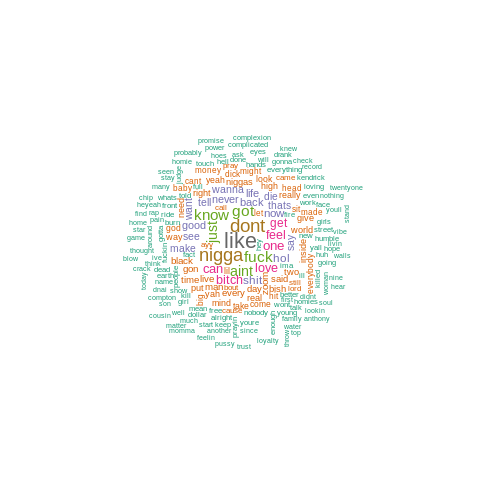

In [9]:
%%R

# plotting word cloud

set.seed(1234)
wordcloud(words = lyrics_wc_df$word, freq = lyrics_wc_df$freq, 
          min.freq = 1,scale=c(1.8,.5),
          max.words=200, random.order=FALSE, rot.per=0.15, 
          colors=brewer.pal(8, "Dark2"))

In [10]:
%R lyrics


,artist,album,track_n,line,lyric,track_title
1,Kendrick Lamar,DAMN,1,1,Is it wickedness?,BLOOD.
2,Kendrick Lamar,DAMN,1,2,Is it weakness?,BLOOD.
3,Kendrick Lamar,DAMN,1,3,You decide,BLOOD.
4,Kendrick Lamar,DAMN,1,4,Are we gonna live or die?,BLOOD.
5,Kendrick Lamar,DAMN,1,5,So I was takin' a walk the other day,BLOOD.
...,...,...,...,...,...,...
1526,Kendrick Lamar,Section.80,16,19,You'd die from diabetes if these other niggas ...,HiiiPoWeR
1527,Kendrick Lamar,Section.80,16,20,And everything on TV just a figment of imagina...,HiiiPoWeR
1528,Kendrick Lamar,Section.80,16,21,"I don't want plastic nation, dread that like a...",HiiiPoWeR
1529,Kendrick Lamar,Section.80,16,22,"While you mothafuckas waiting, I be off the sl...",HiiiPoWeR


Joining, by = "word"


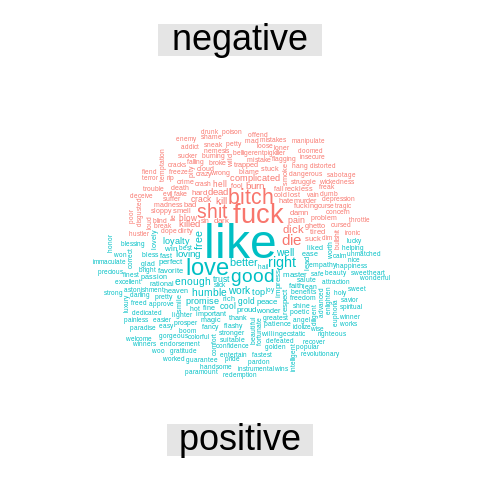

In [11]:
%%R

lyrics$lyric <- as.character(lyrics$lyric)

tidy_lyrics <- lyrics %>% 
  unnest_tokens(word,lyric)

set.seed(1234)
tidy_lyrics %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"), max.words = 250)

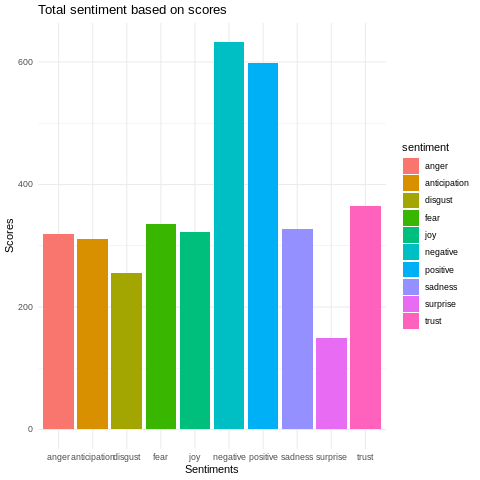

In [12]:
%%R

# Getting the sentiment value for the lyrics
ty_sentiment <- get_nrc_sentiment((lyrics_text))

# Dataframe with cumulative value of the sentiments
sentimentscores <- data.frame(colSums(ty_sentiment[,]))

# Dataframe with sentiment and score as columns
names(sentimentscores) <- "Score"
sentimentscores <- cbind("sentiment"=rownames(sentimentscores),sentimentscores)
rownames(sentimentscores) <- NULL

# Plot for the cumulative sentiments
ggplot(data=sentimentscores,aes(x=sentiment,y=Score))+
  geom_bar(aes(fill=sentiment),stat = "identity")+
  theme(legend.position="none")+
  xlab("Sentiments")+ylab("Scores")+
  ggtitle("Total sentiment based on scores")+
  theme_minimal()

Do you want to download:
 Name: NRC Word-Emotion Association Lexicon 
 URL: http://saifmohammad.com/WebPages/lexicons.html 
 License: License required for commercial use. Please contact Saif M. Mohammad (saif.mohammad@nrc-cnrc.gc.ca). 
 Size: 22.8 MB (cleaned 424 KB) 
 Download mechanism: http 
 Citation info:

This dataset was published in Saif M. Mohammad and Peter Turney. (2013), ``Crowdsourcing a Word-Emotion Association Lexicon.'' Computational Intelligence, 29(3): 436-465.

article{mohammad13,
author = {Mohammad, Saif M. and Turney, Peter D.},
title = {Crowdsourcing a Word-Emotion Association Lexicon},
journal = {Computational Intelligence},
volume = {29},
number = {3},
pages = {436-465},
doi = {10.1111/j.1467-8640.2012.00460.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8640.2012.00460.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1467-8640.2012.00460.x},
year = {2013}
}
If you use this lexicon, then please cite it. 

1: Yes
2: No

Selection

R[write to console]: trying URL 'http://saifmohammad.com/WebDocs/NRC-Emotion-Lexicon.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 24199292 bytes (23.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

Selecting by n


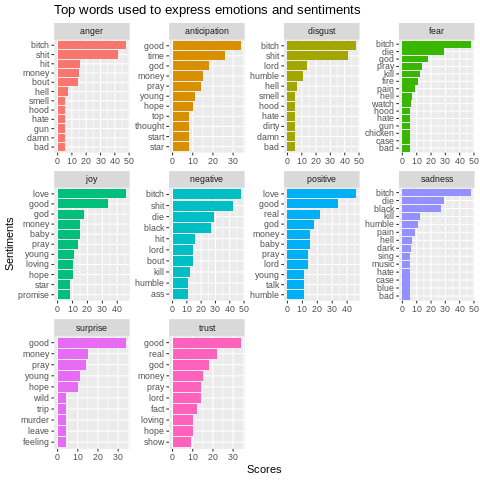

In [13]:
%%R
song_wrd_count <- tidy_lyrics %>% count(track_title)

lyric_counts <- tidy_lyrics %>%
  left_join(song_wrd_count, by = "track_title") %>% 
  rename(total_words=n)

lyric_sentiment <- tidy_lyrics %>% 
  inner_join(get_sentiments("nrc"),by="word")

lyric_sentiment %>% 
  count(word,sentiment,sort=TRUE) %>% 
  group_by(sentiment)%>%top_n(n=10) %>% 
  ungroup() %>%
  ggplot(aes(x=reorder(word,n),y=n,fill=sentiment)) +
  geom_col(show.legend = FALSE) + 
  facet_wrap(~sentiment,scales="free") +
  xlab("Sentiments") + ylab("Scores")+
  ggtitle("Top words used to express emotions and sentiments") +
  coord_flip()